# TP1-Image Transformations and Morphological Operations
** ATRIM - Option DATASIM - Ecole Centrale Nantes **

** Diana Mateus **

Participants: Yueying CAO



### Objectives 

The goal of this lab session is to understand and implement in practice:
- measures to quantitatively characterize an image
- intensity transformations visualizing their effect on the images and their histograms 
- typical morphological operations  


### Instructions
- Prepare a report showing the results of the different steps. The evaluation will pay particular attention to the comments that explain the individual steps and discuss observations about the results.
- Upload to hippocampus BOTH your report AND code (.ipynb). 
- If you choose to create the report directly on a python notebook, you can submit as report an .html or pdf file (in addition tothe .ipynb). In this case make sure you transform the notebook into a proper report, eventually moving functions to a separate module.



## 0. Preparation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random
from ipywidgets import interact, fixed
import ipywidgets as widgets


__Read and display the images in the provided folders__

Download and unzip the images folder.  If everything goes well, the following code will loop over the images and show them on the screen. If no image shows up, it is likely that the file path is erroneous.

In [2]:
#IMDIR = "./images/" #"/Replace/With/Your/Filepath"
IMDIR = "./images/"

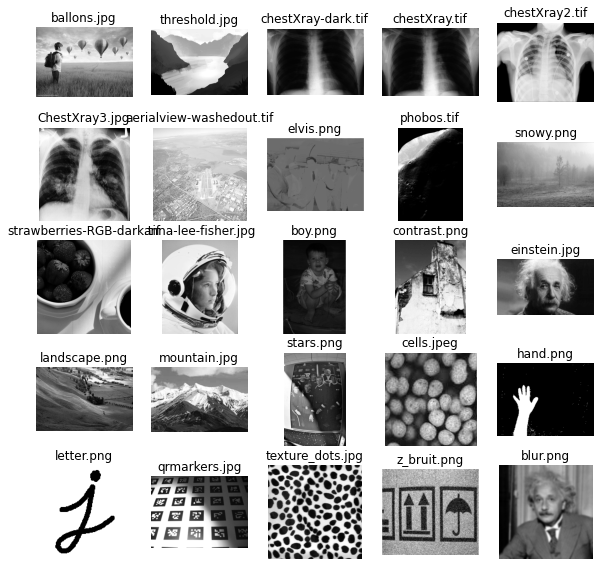

In [3]:
           
#The following lines control how big the images are shown on the screen
width=10 
height=10
plt.rcParams['figure.figsize'] = [width, height]


#we create a figure
fig=plt.figure()

#and look for all available image files in IMDIR
im_counter = 1

# check if the image path exist
if (os.path.exists(IMDIR) == False):
    print("IMDIR doesn't exist, please check the entered path")
else:
    for root, dirnames, filenames in os.walk(IMDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
        
            #filter only image files with the following format
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
                # uncomment the next line to print the file paths if no image is being shown
                # print(filename)
            
                # read the image 
                im = io.imread(f,as_gray=True)
            
                if im_counter > 25: #showing maximum 25 images
                    break
                
                # display it
                plt.subplot(5,5,im_counter)
                plt.imshow(im, cmap='gray')
                plt.title(filename)
                plt.axis('off')
                im_counter +=1 
            

    plt.show()

# 1. Global Measures

### 1.1. Image histograms and global measures

**a)** Create a function that measures the luminance and contrast of an image. 

**b)** Create a function to compute and visualize the histogram AND the cummulative histogram of an image, 

*Hint:* You can use ``np.histogram`` or implement your own. In the first case, to plot with ``plt.plot`` you may need to compute the bin centers from the bin limits to make the dimensions of the histogram and the bins match.
```python
    hist, bin_limits = np.histogram(input_image, bins=256)
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
```

**c)** Apply the provided shuffle function, which recieves a grayscale image, shuffles its pixels and returns the shuffled image.

*It uses:*
```python
np.random.shuffle(im.ravel())
```
**d)** 
Loop over the images in the ``chestXRay`` folder and apply the shuffle function. For each image (before AND after shuffling)
- print the size of the image
- print its min, max values 
- print the computed luminance and contrast.
- plot the image before and after the shuffling
- plot the histogram and cummulative histogram before and after the shuffling
*Hint"* use 
``plt.subplot`` to plot several plots in a single figure

**e)** Explain your observations


In [4]:
#4students
import skimage.metrics as metrics

#Receives only grayscale images
def shuffle_image(im_gray):
    im_shuffle = im_gray.ravel().copy()
    np.random.shuffle(im_shuffle)
    im_shuffle=np.reshape(im_shuffle, im_gray.shape)
    return im_shuffle

In [5]:
# define the functions here

# a) measure the luminance and contrast of an image
def measure_luminance(img):
    if len(img.shape) == 3:      # For RGB images
        # compute luminance of RGB images with L(I) =0.3086 * Red(I) + 0.6094 * Green(I) + 0.0820 * Blue(I)
        lumin = 0.3086*np.mean(img[:,:,0]) + 0.6094*np.mean(img[:,:,1]) + 0.0820*np.mean(img[:,:,2])    
    else:                      # For grayscale images  
        lumin = np.mean(img)
    return lumin

def measure_contrast(img):
    if len(img.shape) == 3:
        print("Sorry here we are talking about contrast of grayscale images")
    else:
        lumin = measure_luminance(img)
        contrast = 0
        ssum = 0
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                contrast = contrast + (img[i,j]-lumin)**2
        contrast = (contrast/(img.shape[0]*img.shape[1]))**0.5
        return contrast


In [8]:
# b) compute and visualize the histogram AND the cumulative histogram of an image       
def plot_hist(img):
    # need to normalize img at first, if it's not
    if img.max() > 1:
        img = (img-img.min())/(img.max()-img.min())
    
    hist, bin_limits = np.histogram(img, bins=256)
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
    
    # plot histogram
    plt.bar(bin_centers, hist, width=1/256)
    plt.title('histogram')
    

def plot_cumhist(img):
    if img.max() > 1:
        img = (img-img.min())/(img.max()-img.min())
    
    hist, bin_limits = np.histogram(img, bins=256)
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
    
    hist_cum = []
    for i, hist_i in enumerate(hist):
        temp=sum(hist[j] for j in range(i))
        hist_cum.append(temp)
    plt.bar(bin_centers, hist_cum, width=1/256)
    plt.title('cummulative histogram')

the size of chestXray-dark.tif is:  (418, 602)
the min value is 3, and max value is 227
its luminance is 60.08, and contrast is 56.47


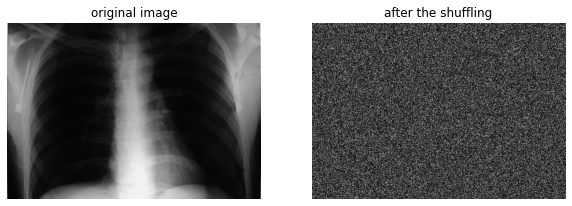

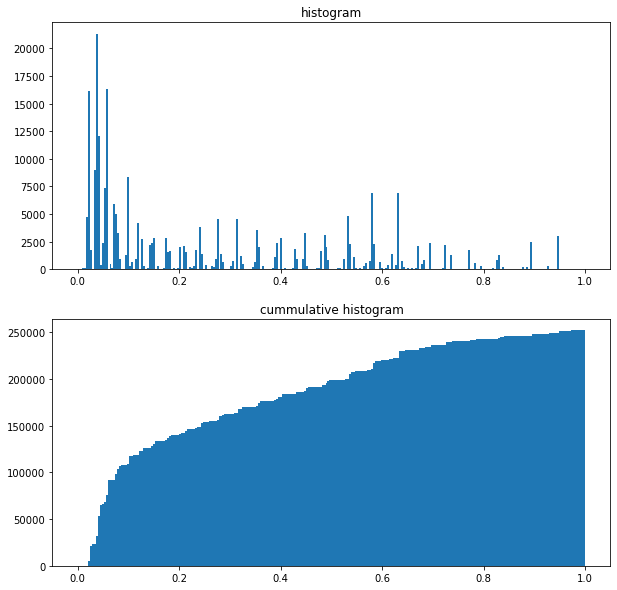

the size of chestXray.tif is:  (503, 720)
the min value is 3, and max value is 222
its luminance is 59.86, and contrast is 56.26


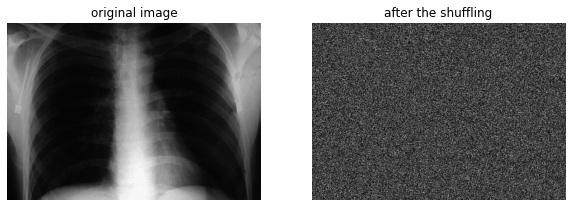

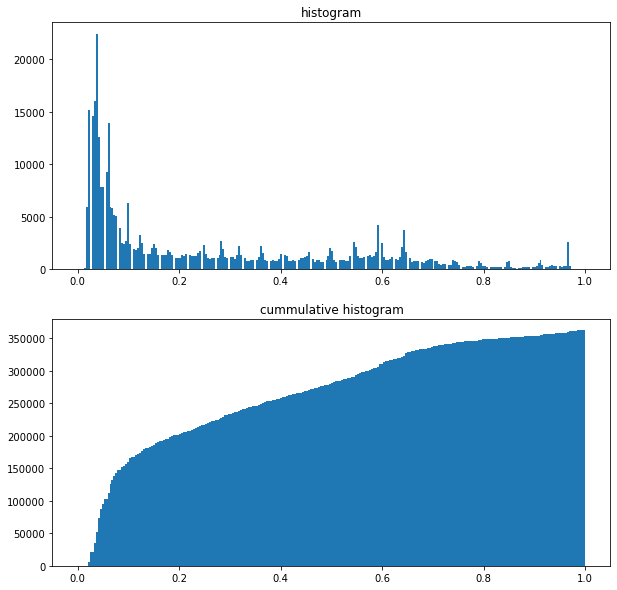

the size of chestXray2.tif is:  (493, 600)
the min value is 0, and max value is 253
its luminance is 141.87, and contrast is 84.50


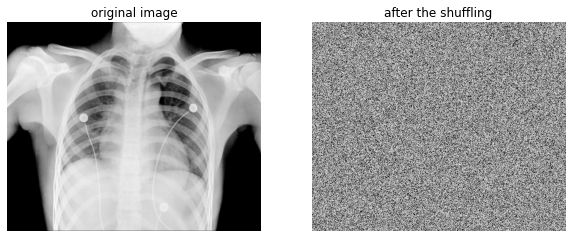

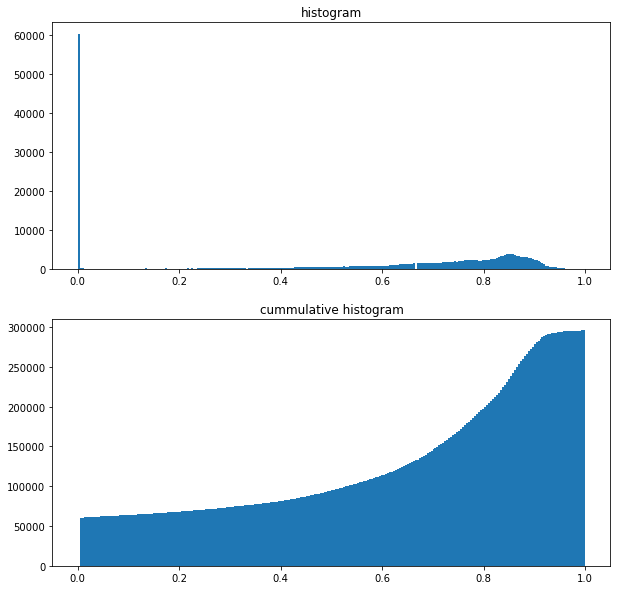

the size of ChestXray3.jpg is:  (1790, 1726)
the min value is 23, and max value is 254
its luminance is 142.42, and contrast is 68.67


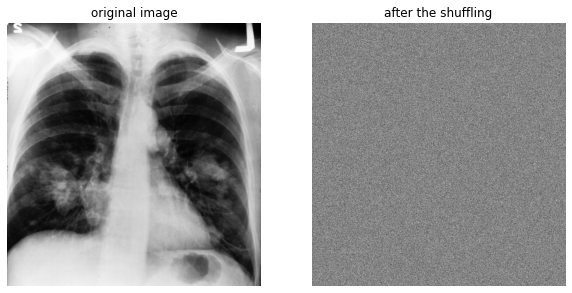

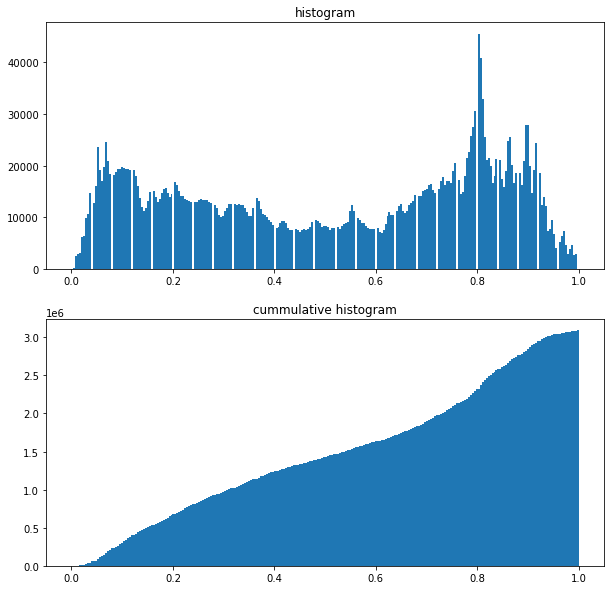

In [9]:
# Loop over the images here 

SUBDIR = os.path.join (IMDIR,"chestXray/") #"/Replace/With/Your/Filepath"
if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            #filter only image files with the following format
            # here I keep all format in case I can't directly check chestXray file to see the files formats
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):   
                # read the image 
                im = io.imread(f,as_gray=True)
                
                # print the information of the image
                im_shuffle = shuffle_image(im)
                print('the size of',filename, 'is: ', im.shape)
                print('the min value is {}, and max value is {}'.format(im.min(),im.max()))
                print('its luminance is {:.2f}, and contrast is {:.2f}'.format(measure_luminance(im), measure_contrast(im)))
                
                # create a figure for each image
                plt.figure()
                # plot the image before and after shuffling
                plt.subplot(1,2,1)
                plt.imshow(im, cmap='gray')
                plt.title('original image')
                plt.axis("off")
                plt.subplot(1,2,2)
                plt.imshow(im_shuffle, cmap='gray')
                plt.title('after the shuffling')
                plt.axis("off")
                
                plt.figure()
                plt.subplot(2,1,1)
                plot_hist(im)
                plt.subplot(2,1,2)
                plot_cumhist(im)
                
                plt.show()


### 1.2 PSNR
**a)** Create a function that computes the Peak SNR (PSNR) of an image .
*Hint*: The Mean Square Error (MSE) and the Peak Signal to Noise Ratio (PSNR)  are the two error metrics used to compare image quality when a reference image is available. The MSE represents the cumulative squared error between the compressed and the original image, whereas PSNR represents a measure of the peak error. The lower the value of MSE, the lower the error. Higher PSNR are usually attributted better quality https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

**b)** Using the global measures (min, max, luminance, contrast, histogram, cumulative histogram) above, AND the PSNR. What can you say about the image quality of the images in the ``psnr'' folders? Use the 'einstein.png' image as reference for the PSNR calculation.  Are the MSE and PSNR always coherent?

Hint:  Discuss the results by groups:

-the gaussian-m**.tif images

-the speckle-m**.tif images

-the blur, contrast, impulse (salt and pepper noise) and jpeg (jpeg compressed) images


In [10]:
# compute the Peak SNR
def PSNR(img, img_noise):
    # need to normalize img at first, if it's not normalized between [0,1]
    if img.max() > 1:
        img = (img-img.min())/(img.max()-img.min())

    mse = np.mean((img/1.0 - img_noise/1.0) ** 2)
    print("the MSE in PSNR calculation is:  ",mse)
    if(mse == 0):  # MSE is zero when the noise is not in the signal
        return 100
    
    # compute the possible maximum pixel value
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / (mse**0.5))
    return psnr


the size of blur.png is:  (256, 256)
the min value is 0.08627450980392158, and max value is 0.8980392156862745
its luminance is 0.40, and contrast is 0.15
the MSE in PSNR calculation is:   0.0022131263178525084
the PSNR between this image and reference is 26.55


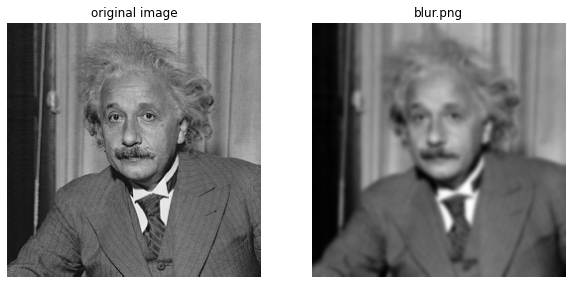

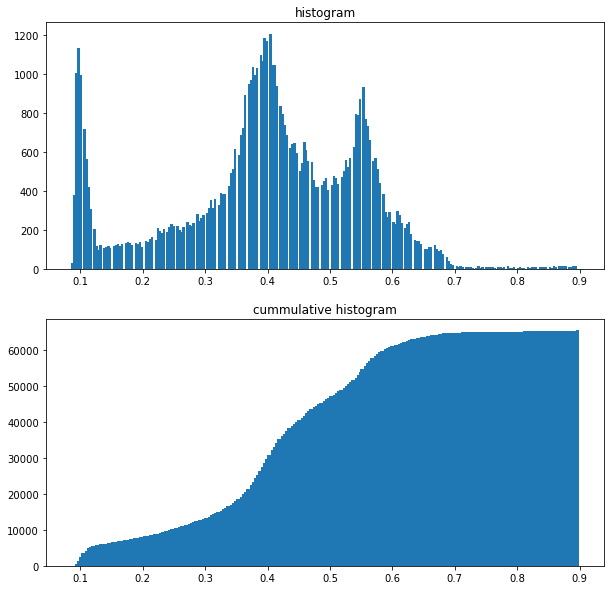

the size of contrast.png is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.40, and contrast is 0.21
the MSE in PSNR calculation is:   0.0022178979013480395
the PSNR between this image and reference is 26.54


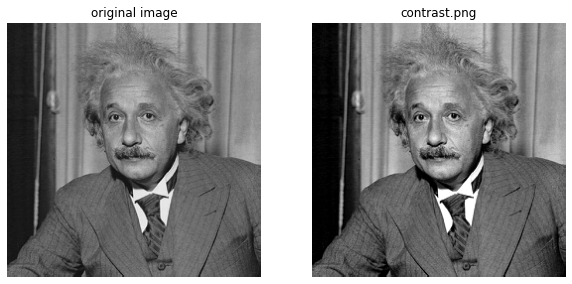

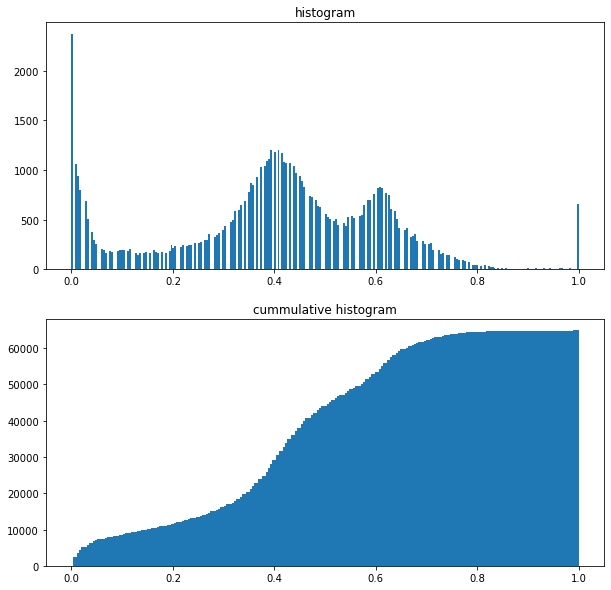

the size of einstein.png is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.40, and contrast is 0.16
the MSE in PSNR calculation is:   0.0
the PSNR between this image and reference is 100.00


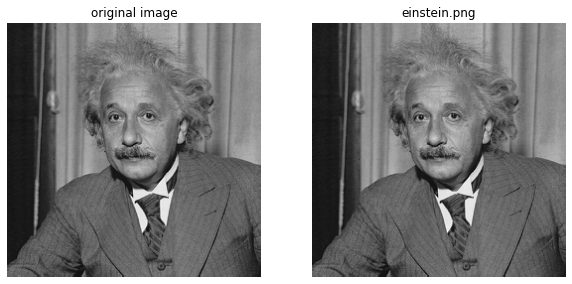

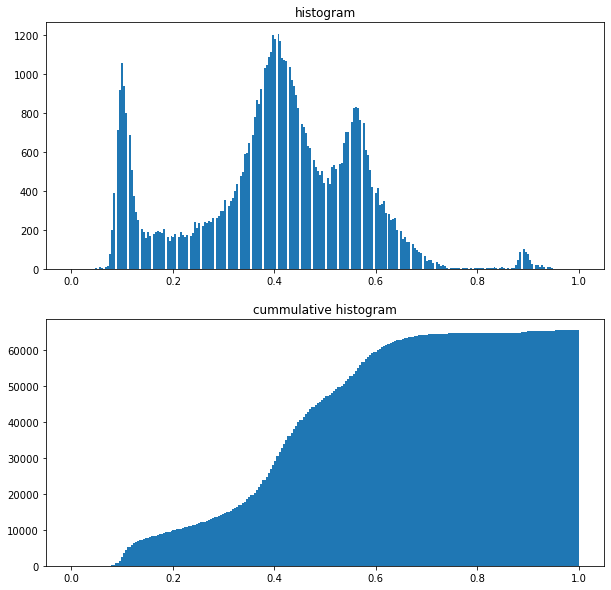

the size of gaussian-mu05.tif is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.45, and contrast is 0.19
the MSE in PSNR calculation is:   0.012365167969779281
the PSNR between this image and reference is 19.08


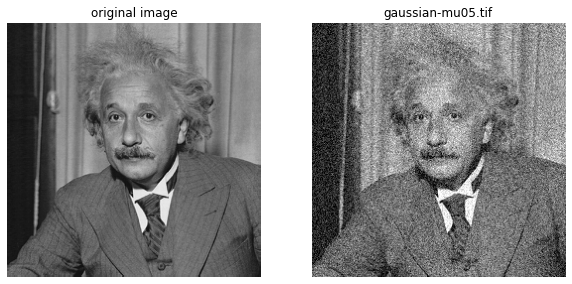

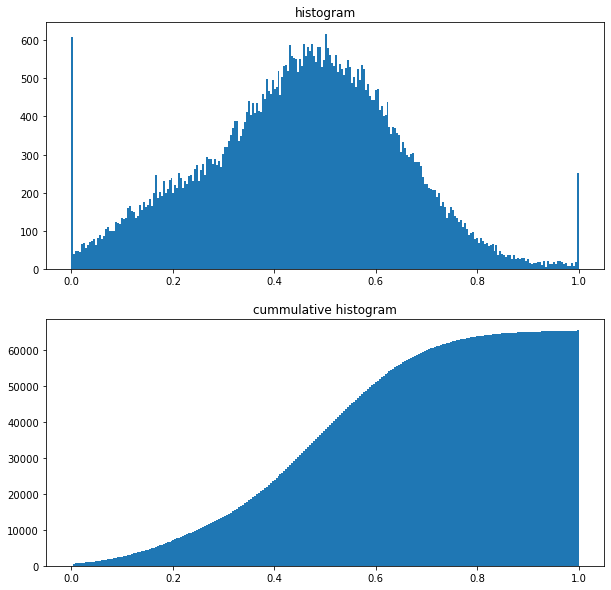

the size of gaussian-mu1.tif is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.50, and contrast is 0.19
the MSE in PSNR calculation is:   0.0196939502928533
the PSNR between this image and reference is 17.06


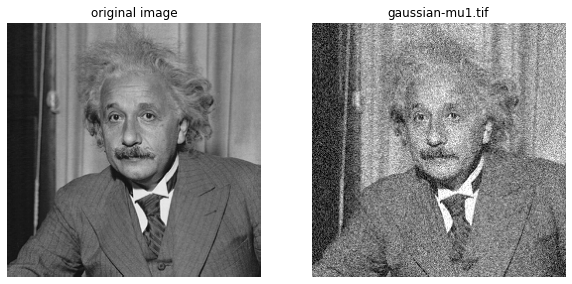

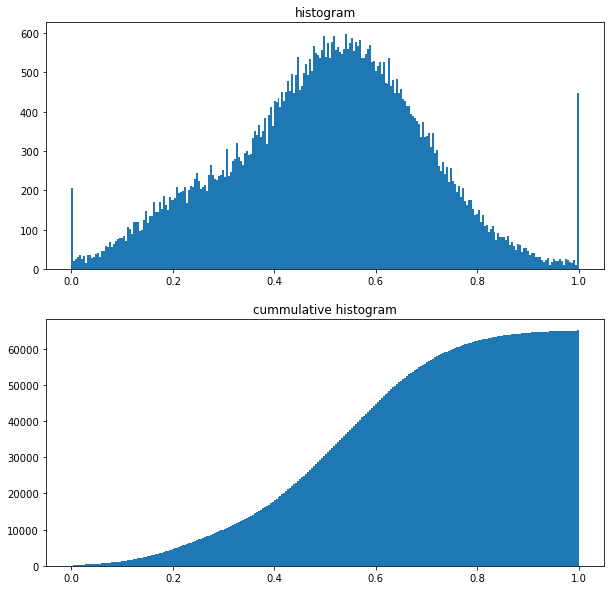

the size of gaussian-mu3.tif is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.70, and contrast is 0.18
the MSE in PSNR calculation is:   0.09697450441223107
the PSNR between this image and reference is 10.13


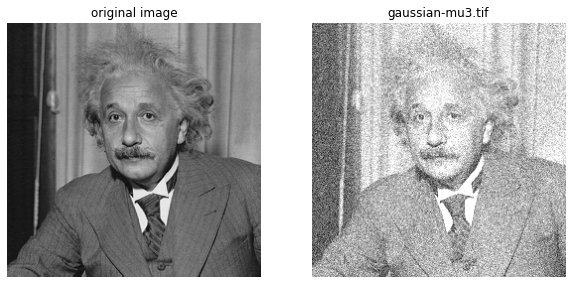

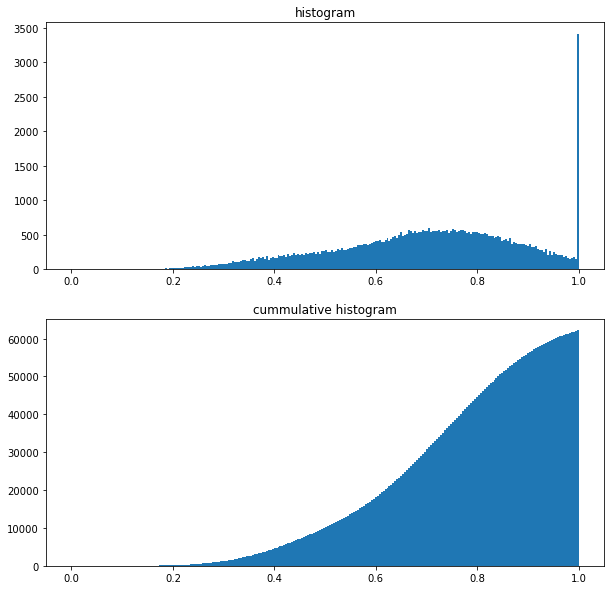

the size of impulse.png is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.40, and contrast is 0.17
the MSE in PSNR calculation is:   0.0022135951692257784
the PSNR between this image and reference is 26.55


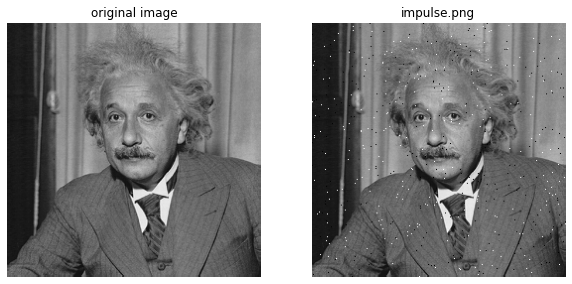

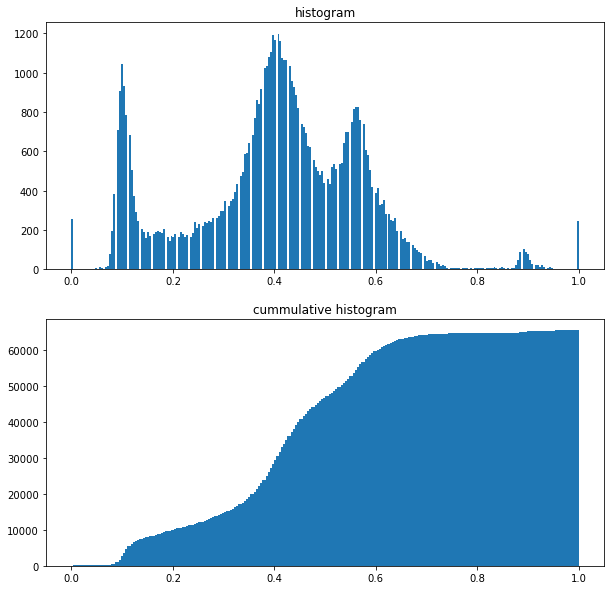

the size of jpg.png is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.40, and contrast is 0.16
the MSE in PSNR calculation is:   0.0021830517784626104
the PSNR between this image and reference is 26.61


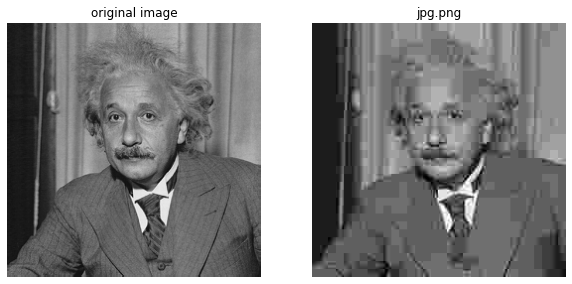

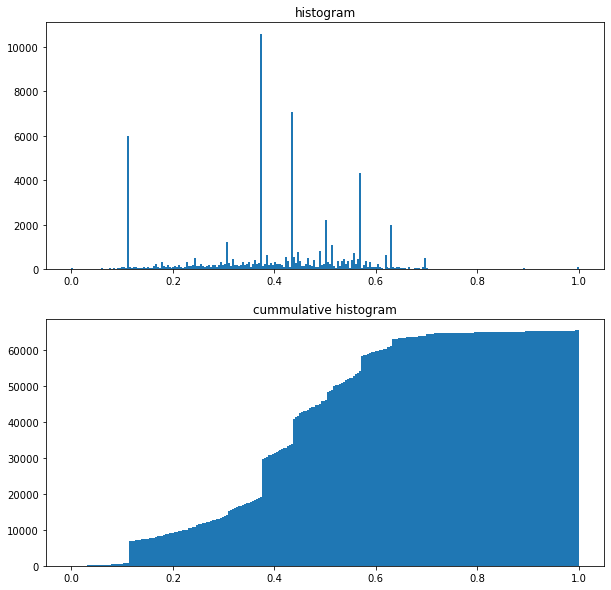

the size of speckle-mu05.tif is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.42, and contrast is 0.18
the MSE in PSNR calculation is:   0.002313883056166436
the PSNR between this image and reference is 26.36


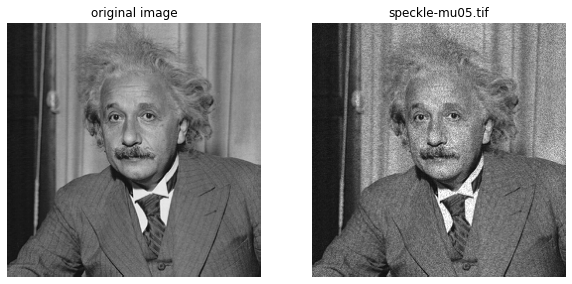

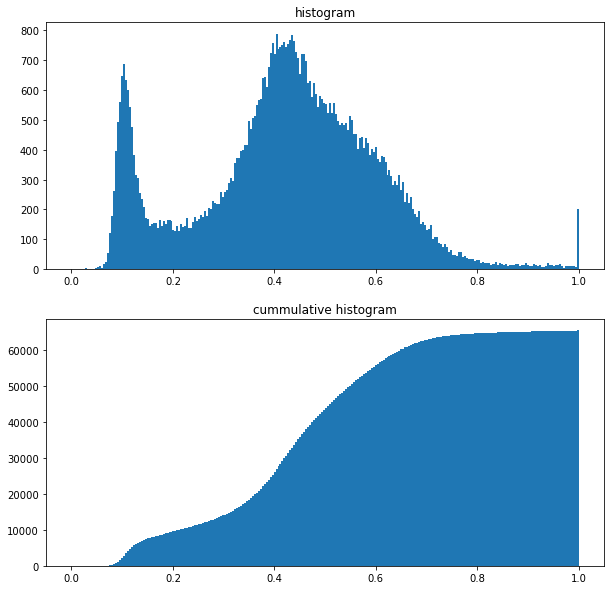

the size of speckle-mu1.tif is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.44, and contrast is 0.18
the MSE in PSNR calculation is:   0.0037031871316943964
the PSNR between this image and reference is 24.31


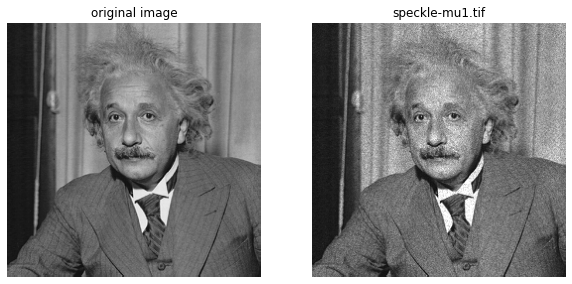

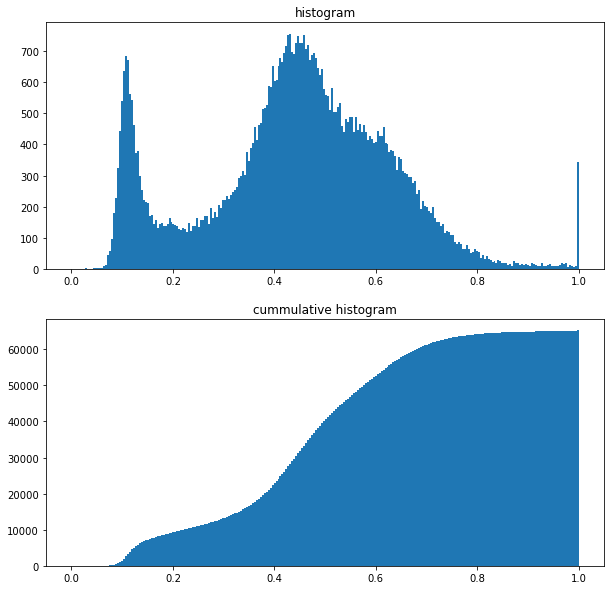

the size of speckle-mu3.tif is:  (256, 256)
the min value is 0.0, and max value is 1.0
its luminance is 0.52, and contrast is 0.21
the MSE in PSNR calculation is:   0.018097598597434175
the PSNR between this image and reference is 17.42


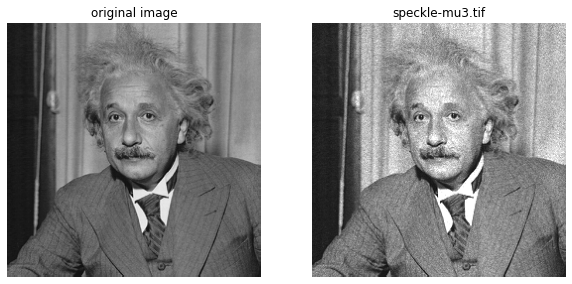

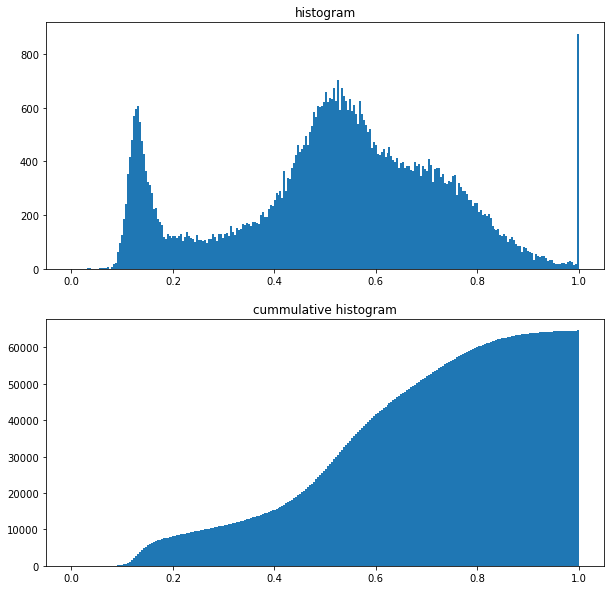

In [11]:
SUBDIR = os.path.join(IMDIR,'psnr/')#"/Replace/With/Your/Filepath"
refer_path = os.path.join(IMDIR,'psnr/einstein.png')
refer = io.imread(refer_path, as_gray=True)

if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            #filter only image files with the following format
            # here I keep all format in case I can't directly check chestXray file to see the files formats
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):   
                # read the image 
                im = io.imread(f,as_gray=True)
                
                # print the information of the image
                print('the size of',filename, 'is: ', im.shape)
                print('the min value is {}, and max value is {}'.format(im.min(),im.max()))
                print('its luminance is {:.2f}, and contrast is {:.2f}'.format(measure_luminance(im), measure_contrast(im)))
                psnr = PSNR(refer, im)
                print('the PSNR between this image and reference is {:.2f}'.format(psnr))
                
                # create a figure for each image
                plt.figure()
                # plot the image before and after shuffling
                plt.subplot(1,2,1)
                plt.imshow(refer, cmap='gray')
                plt.title('original image')
                plt.axis("off")
                plt.subplot(1,2,2)
                plt.imshow(im, cmap='gray')
                plt.title(filename)
                plt.axis("off")
                
                plt.figure()
                plt.subplot(2,1,1)
                plot_hist(im)
                plt.subplot(2,1,2)
                plot_cumhist(im)
                
                plt.show()

                        



# 2. Intensity transformations and Histograms

### 2.1 Color to grayscale and grayscale to black and white 
**(a)** Create a function that receives as input a color image and transforms it to grayscale. Read the image **outside** the function. Apply the function to the ```ballons.jpg``` image.

**(b)** Create a function that reads a grayscale image and given a parameter ```k``` implements a threshold function and provides. Apply and show the result on the ```threshold.jpg``` image. Show the results for various k. **Hint**: you may want to use the ```np.where``` function

**Advanced**: you may want to use the ```interact``` functionalities from the ipywidgets module 
```
from ipywidgets import interact
import ipywidgets as widgets
```
to create a sliding bar for the threshold parameter or the color saturation

In [13]:
# define functions here
def rgb2gray(img):
    # here use the weighted method, also called the luminosity method to convert RGB to grayscale
    gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    return gray

def binarize(img, k):
    # Binarization
    # check if the image is not in grayscale
    if len(img.shape)==3:
        # img = rgb2gray(img)
        print("please input a grayscale image")

    img[np.where(img>k)] = 255
    img[np.where(img<k)] = 0
    return img


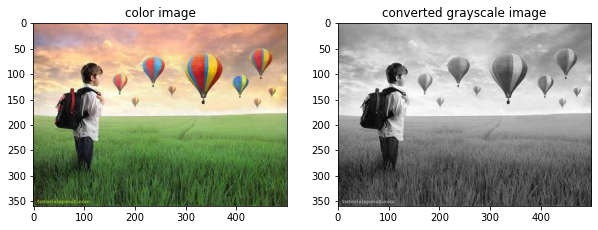

In [14]:
# a) apply the function of convert RGB to grayscale to the ballons.jpg
plt.figure()
ballons = io.imread('./images/ballons.jpg')
plt.subplot(1,2,1)
plt.title('color image')
plt.imshow(ballons)

ballons = rgb2gray(ballons)
plt.subplot(1,2,2)
plt.title('converted grayscale image')
plt.imshow(ballons, cmap='gray')

In [15]:
# b) Apply and show the result on the threshold.jpg image
# first use the slider to determin threshold k
slider_k = widgets.IntSlider(value=150, min=0, max=255, description='threshold k:')
display(slider_k)


IntSlider(value=150, description='threshold k:', max=255)

now the threshold is:  81


<Figure size 720x720 with 0 Axes>

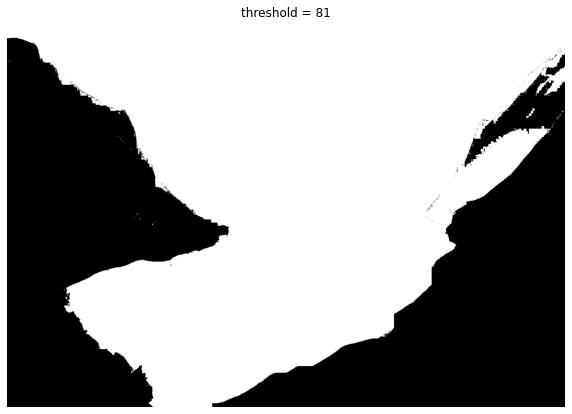

<Figure size 720x720 with 0 Axes>

In [16]:
# when you set a new k using above slider, please re-run this Cell

print("now the threshold is: ", slider_k.value)
thresh = io.imread('./images/threshold.jpg')
thresh = rgb2gray(thresh)
thresh = binarize(thresh, slider_k.value)
plt.imshow(thresh, cmap='gray')
plt.title('threshold = '+str(slider_k.value))
plt.axis('off')
plt.figure()


### 2.2 Graylevel transformations and transfer functions

Implement the following graylevel transformations as independent functions. Then apply the functions to the images in the 
```
histograms
``` 
folder.

**a)** Implement a generic linear transformation parameterized by a and b such that its transfer function has the form ```f(x) = a x + b``` 

**b)** Implement a function that inverts the image intensities

**c)** Implement one of the nonlinear parametric transfer functions (normalization with saturation, contrast stretching, gamma, ...)

**(d)** Plot the transfer functions for all transformations in (a) to (d)

**(e)** Loop over the images in the folder and display the results for each image:
- The original and the transformed images.
- The transfer function
- The original and transformed histogram. 

**Hints** 
- set the horizontal limits fo the histograms to a fix size e.g. ```set_lim([0 255])```
- Make sure that the histograms associated to a single figure have comparable vertical axis limits. 

**(f)** Describe the relations between the images and histograms with respect to the transfer functions in each case

(Removed)
** Implement  a ```contrast_normalization``` function which has a **piecewise linear** transfer function with **saturation**.  Saturate the 5% of the darkest and 5% of the brightest pixels.

**Hint:**
Use the following lines to compute the intensity at which the 5% is reached
```
min_intensity=stats.scoreatpercentile(image,5)
max_intensity=stats.scoreatpercentile(image,95)
```
All values before min_intensity should be saturated to 0 and all above max_intensity to 1.0

In [17]:
# a) linear transformation f(x)=ax+b
def linear(img, a=1, b=50):
    img = a*img+b
    img[np.where(img>255)] = 255
    img[np.where(img<0)] = 0
    return img

def invert(img):
    # Inversion intensity is the inverse pixel value
    # i.e., the difference of subtracting 255 from the pixel value
    img = 255-img
    return img

def nonlinear(img):
    # gamma transfomation
    gamma = 0.5
    img = 255*(img / 255) ** gamma
    img[np.where(img>255)] = 255
    img[np.where(img<0)] = 0
    return img

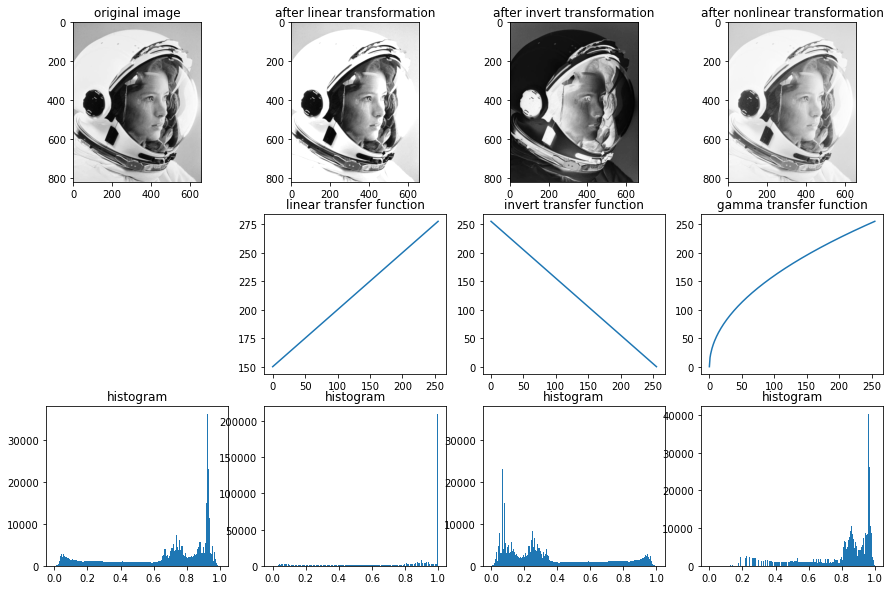

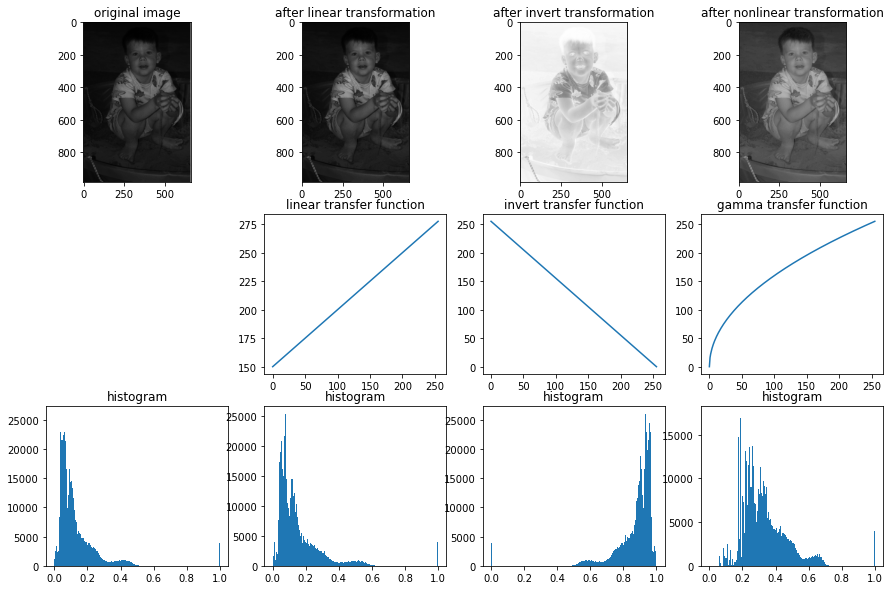

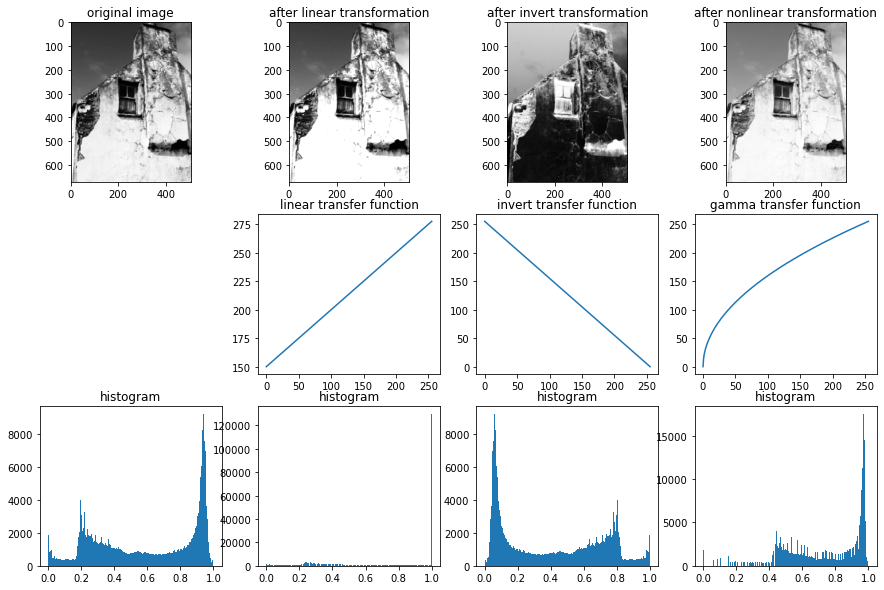

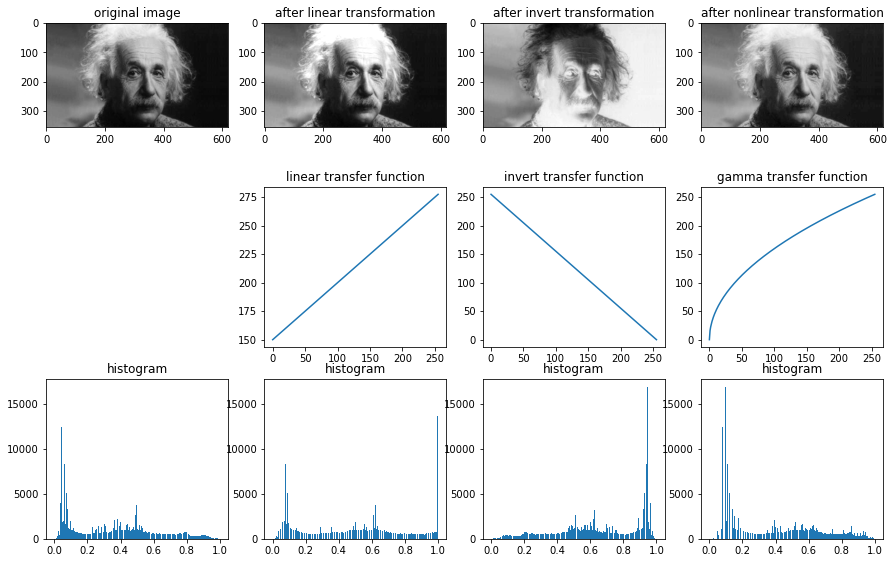

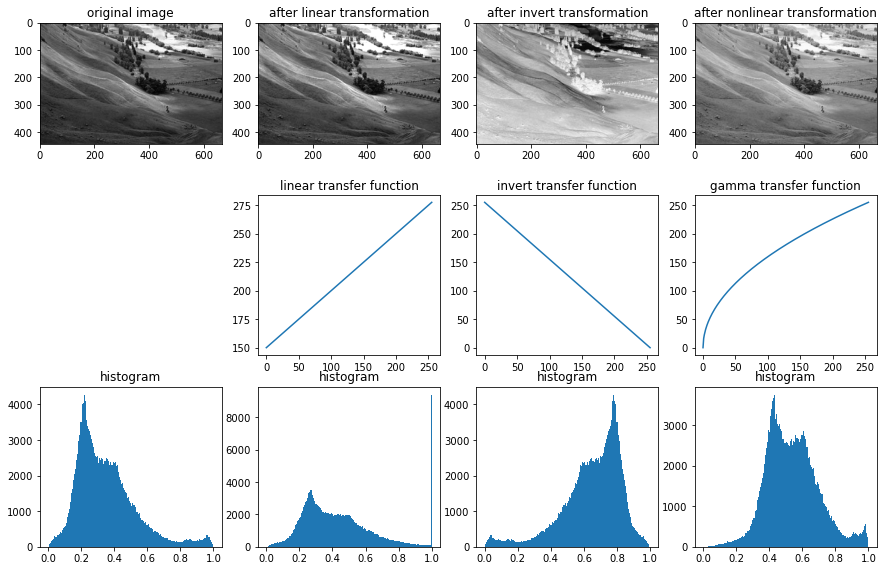

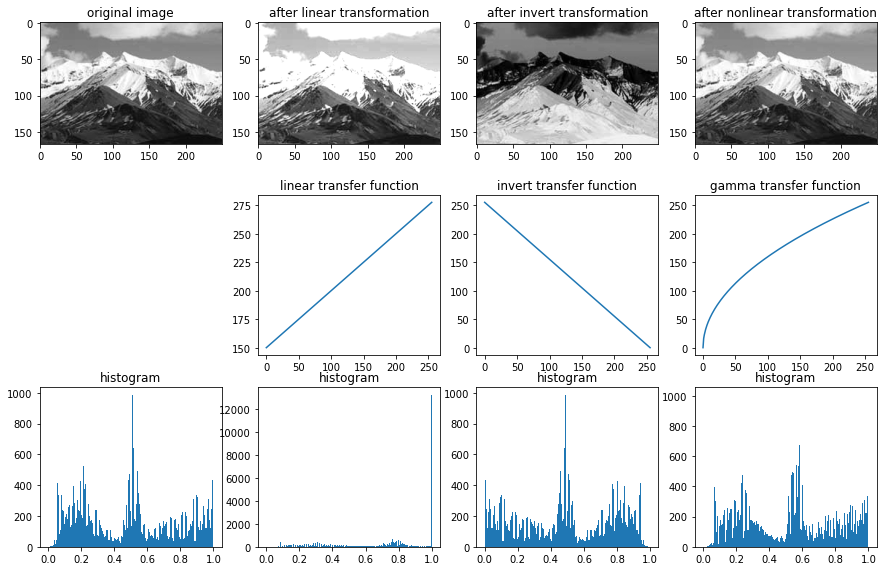

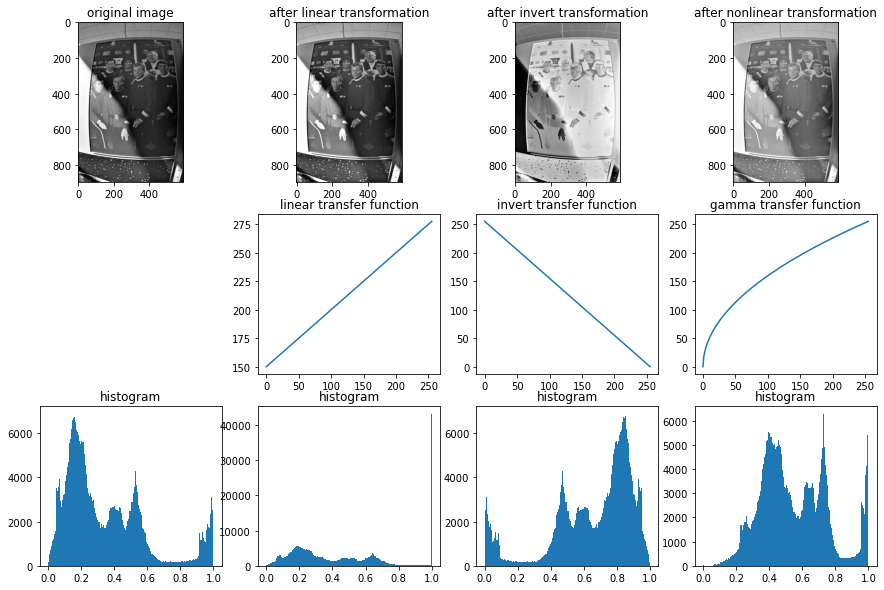

In [18]:
width=15
height=10
plt.rcParams['figure.figsize'] = [width, height]

from scipy import stats
from scipy.special import expit

SUBDIR = os.path.join(IMDIR, "histograms")
x = [i for i in range(256)]

if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            #filter only image files with the following format
            # here I keep all format in case I can't directly check chestXray file to see the files formats
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):  
                plt.figure()
                
                # read the image 
                im = io.imread(f)
                if len(im.shape)==3:
                    im = rgb2gray(im)
                
                plt.subplot(3, 4, 1)
                plt.title('original image')
                plt.imshow(im, cmap='gray')
                plt.subplot(3,4,9)
                plot_hist(im)
                
                 
                plt.subplot(3, 4, 2)   # plot image after transformation
                a = 0.5
                b = 150
                linear_im = linear(im, a, b)
                plt.title('after linear transformation')
                plt.imshow(linear_im, cmap='gray')
                plt.subplot(3,4,6)    # plot transfer funtion
                y = [a*i+b for i in x]
                plt.plot(x, y)
                plt.title('linear transfer function')
                plt.subplot(3,4,10)    # plot histogram
                plot_hist(linear_im)
                
                
                
                plt.subplot(3, 4, 3)
                invert_im = invert(im)
                plt.title('after invert transformation')
                plt.imshow(invert_im, cmap='gray')
                plt.subplot(3,4,7)
                y = [255-i for i in x]
                plt.plot(x, y)
                plt.title('invert transfer function')
                plt.subplot(3,4,11)
                plot_hist(invert_im)
                
                
                plt.subplot(3, 4, 4)
                nonlinear_im = nonlinear(im)
                plt.title('after nonlinear transformation')
                plt.imshow(nonlinear_im, cmap='gray')
                plt.subplot(3,4,8)
                y = [255*(i/255)**0.5 for i in x]    # gamma=0.5
                plt.plot(x, y)
                plt.title('gamma transfer function')
                plt.subplot(3,4,12)
                plot_hist(nonlinear_im)          
                
        plt.show()


2.3 Histogram equalization

**a)** Implement the histogram equalization algorithm and apply it to the images in the ``equalization`` folder. Display the original and the equalized image, the original and the equalized histograms, as well as the original and equalized **cumulative** histograms. 

**b)** Write down a comment about your findings** Explain the resulting images, as well as the shape of the histograms and cumulative histograms before and after the transformation.  Why does it make sense to use the cumulative histogram as a transformation?

**c)** Apply the algorithm to different images and plot the transformed cumulative histogram. What do you observe?


In [19]:
def hist_equali(img):
    hist, bin_limits = np.histogram(img, bins=256)
    cdf = hist.cumsum()            # cumulative distribution function
    cdf = (cdf - cdf.min()) * (255 - 0) / (cdf.max() - cdf.min()) + 0
    result = np.interp(img.flatten(),bin_limits[:-1],cdf)
    return result.reshape(img.shape)


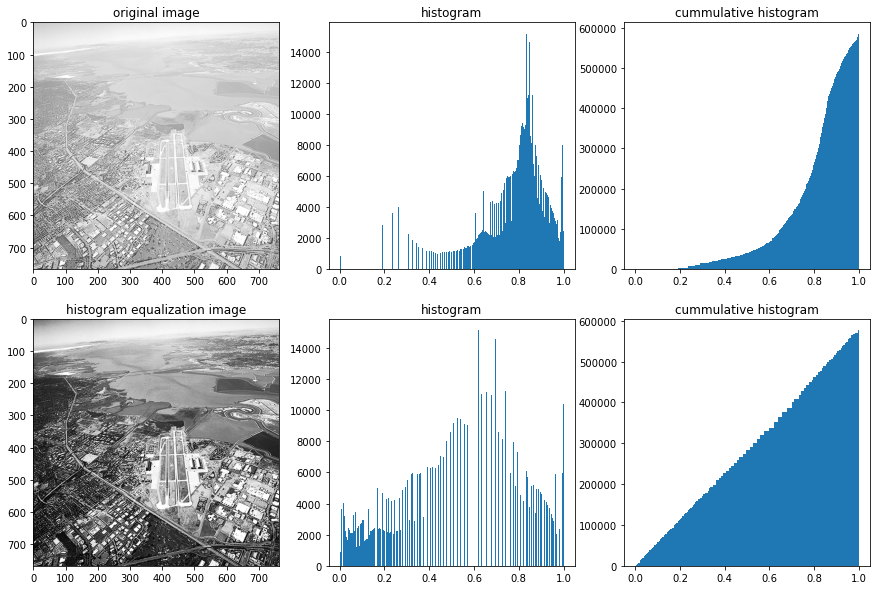

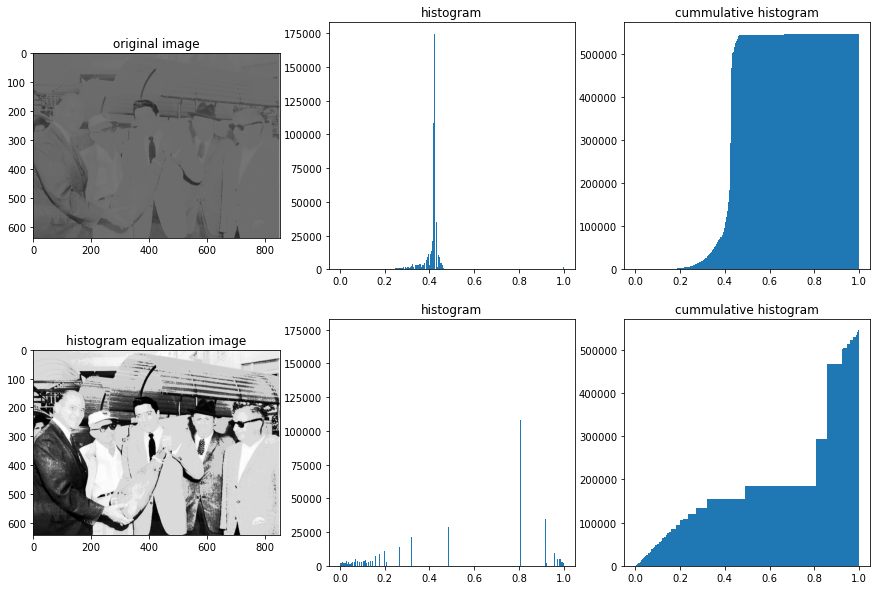

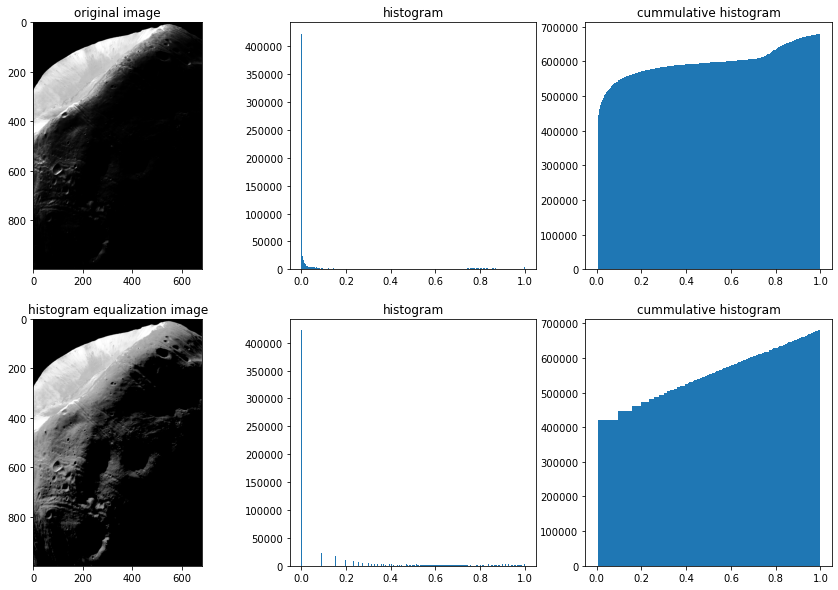

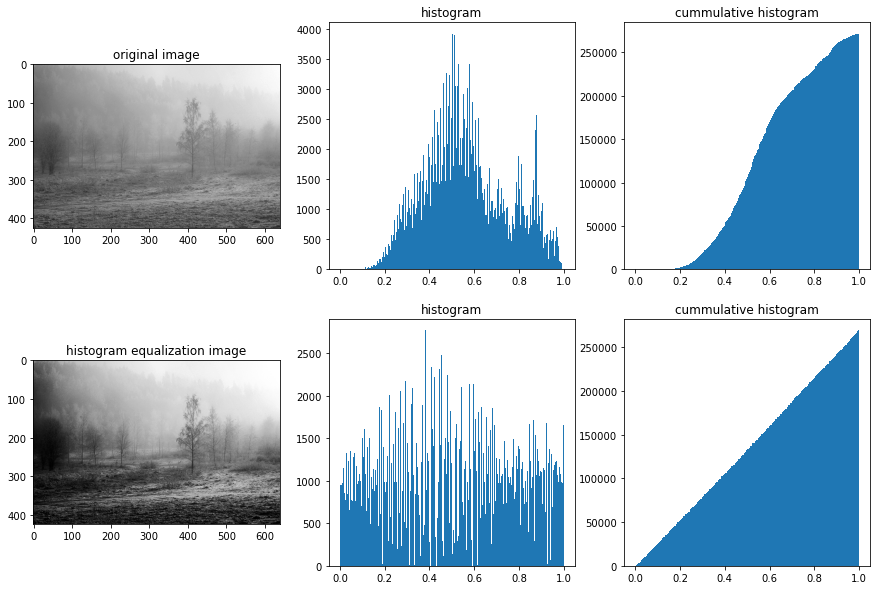

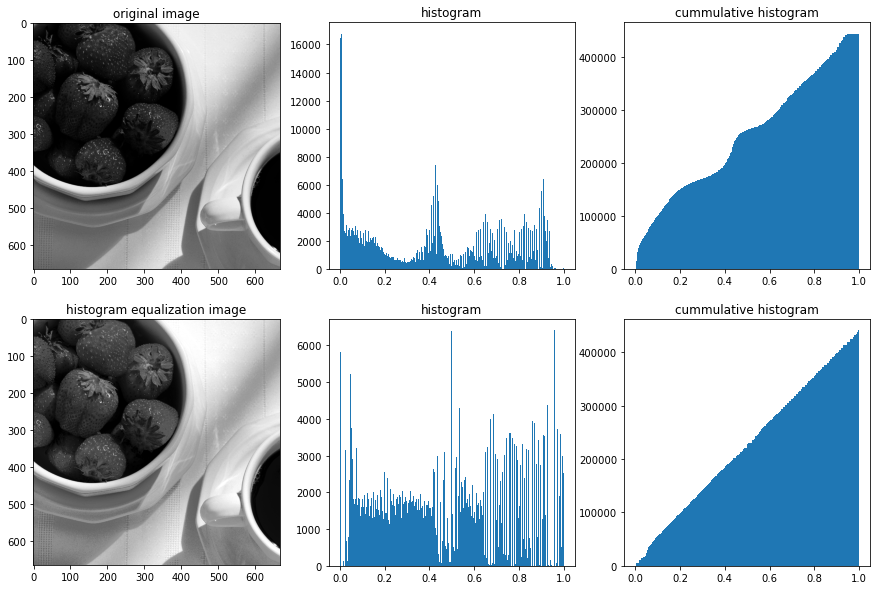

In [20]:
SUBDIR = os.path.join(IMDIR,"equalize")
width=15
height=10
plt.rcParams['figure.figsize'] = [width, height]


if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            #filter only image files with the following format
            # here I keep all format in case I can't directly check chestXray file to see the files formats
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):  
                plt.figure()
                
                # read the image 
                im = io.imread(f)
                if len(im.shape)==3:
                    im = rgb2gray(im)
                
                plt.subplot(2, 3, 1)
                plt.title('original image')
                plt.imshow(im, cmap='gray')
                plt.subplot(2, 3, 2)
                plot_hist(im)
                plt.subplot(2, 3, 3)
                plot_cumhist(im)
                
                plt.subplot(2, 3, 4)
                im_equali = hist_equali(im)
                plt.title('histogram equalization image')
                plt.imshow(im_equali, cmap='gray')
                plt.subplot(2, 3, 5)
                plot_hist(im_equali)
                plt.subplot(2, 3, 6)
                plot_cumhist(im_equali)
                
    plt.show()



## 3.0 Morphological operations


Loop over the images in the ```morphology``` folder. Apply the following morphological operations to the images by first converting them to grayscale: 

**a)** erosion

**b)** dilation

**c)** closure

**d)** opening

**e)** border extraction

**f)** Apply the filters to the original gray scale images. 
- Explain the results for the binary as well as for the grayscale images. 
- What is the effect of the structuring element shape?

Hints: use the scikit help for morphological operations.  For instance to declare an structuring element use
```python
# declare an structuring elment
selem = disk(6)
# apply a scipy morphological operation
eroded_im = erosion(im, selem)
```


**BONUS** implement your own erosion and dilation functions.

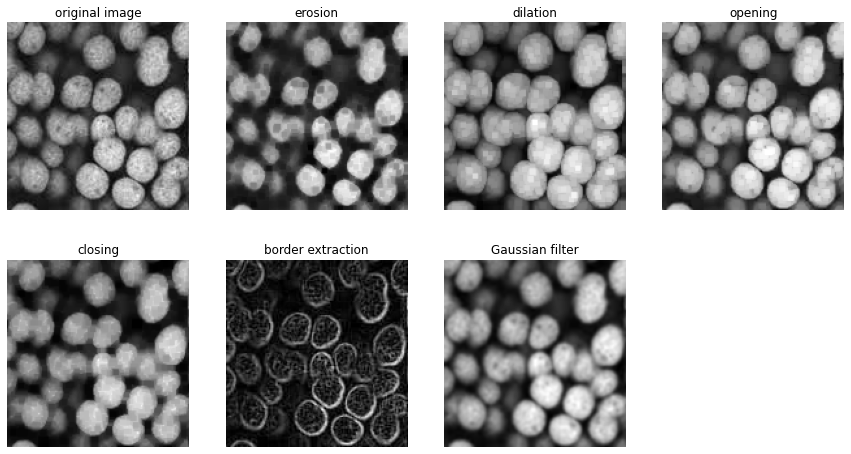

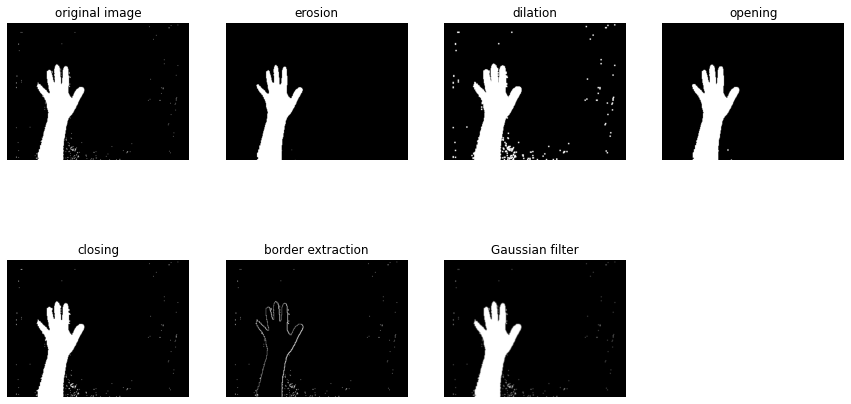

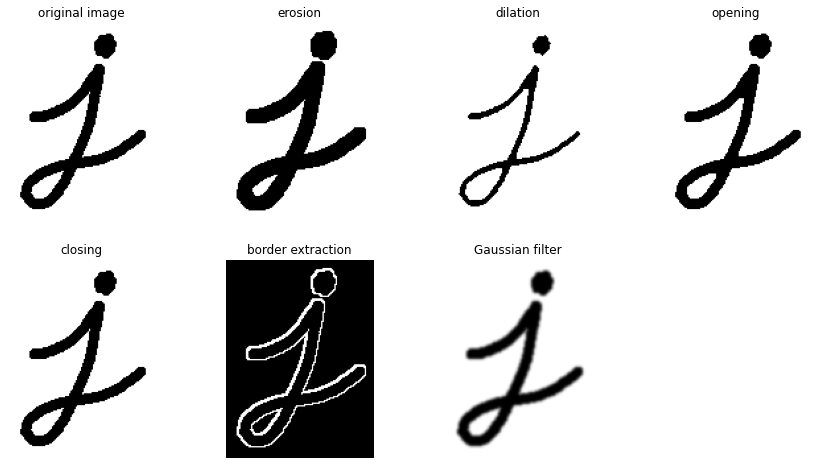

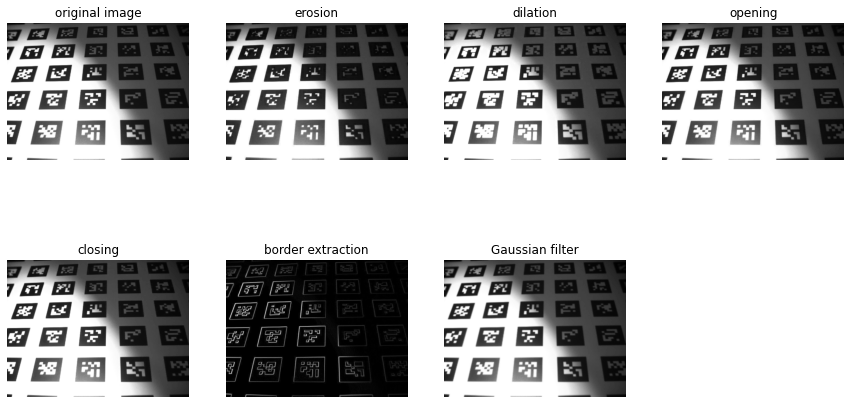

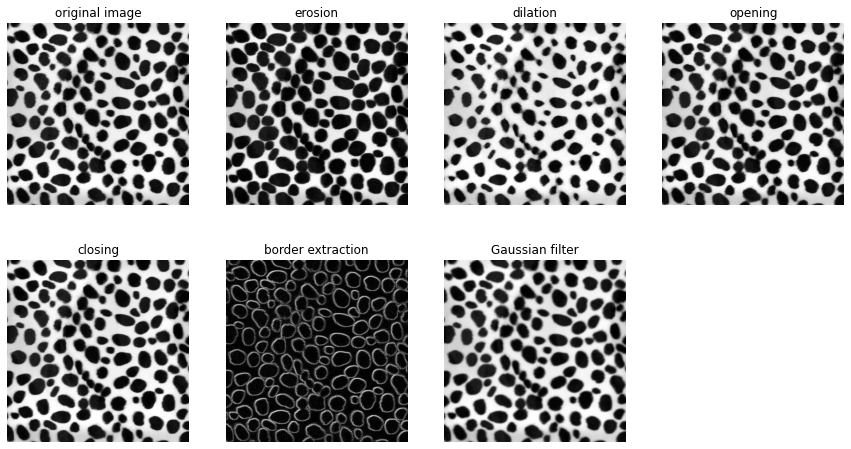

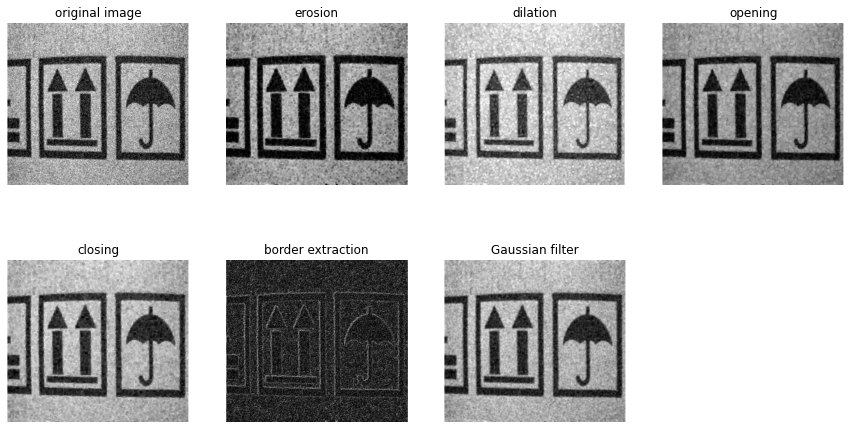

In [21]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk, rectangle
from skimage import filters

SUBDIR = os.path.join(IMDIR, "morphology")
width=15
height=8
plt.rcParams['figure.figsize'] = [width, height]
#selem = disk(3)
selem = rectangle(4,4)

if (os.path.exists(SUBDIR) == False):
    print ('SUBDIR does not exist, please check the entered path')
else: 
    for root, dirnames, filenames in os.walk(SUBDIR):
        for filename in filenames:
            f = os.path.join(root, filename)
            
            #filter only image files with the following format
            # here I keep all format in case I can't directly check chestXray file to see the files formats
            if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):  
                plt.figure()
                
                # read the image 
                im = io.imread(f)
                if len(im.shape)==3:
                    im = rgb2gray(im)
                    
                plt.subplot(2,4,1)
                plt.imshow(im, cmap='gray')
                plt.axis('off')
                plt.title('original image')
                
                plt.subplot(2,4,2)
                ero_im = erosion(im, selem)
                plt.imshow(ero_im, cmap='gray')
                plt.axis('off')
                plt.title('erosion')
                
                plt.subplot(2,4,3)
                dila_im = dilation(im, selem)
                plt.imshow(dila_im, cmap='gray')
                plt.axis('off')
                plt.title('dilation')
                
                plt.subplot(2,4,4)
                open_im = opening(im, selem)
                plt.imshow(open_im, cmap='gray')
                plt.axis('off')
                plt.title('opening')
                
                plt.subplot(2,4,5)
                clo_im = closing(im, selem)
                plt.imshow(clo_im, cmap='gray')
                plt.axis('off')
                plt.title('closing')
                
                # Boundaries can be extracted by:
                # 1. Eroding the image input image.
                # 2. Subtracting the eroded image from the source image
                plt.subplot(2,4,6)
                border_im = im - erosion(im, selem)
                plt.imshow(border_im, cmap='gray')
                plt.axis('off')
                plt.title('border extraction')
                
                # Gaussian filter
                plt.subplot(2,4,7)
                filter_im = filters.gaussian(im,sigma=1)
                plt.imshow(filter_im, cmap='gray')
                plt.axis('off')
                plt.title('Gaussian filter')
                
                
                
    plt.show()
